# Installation of Required Libraries

Before proceeding, ensure that all required libraries are installed.

# Importing Necessary Libraries

In [1]:
#suppress warnings generated by the code
def warn(*args,**kwargs):
    pass
import warnings
warnings.warn=warn
warnings.filterwarnings('ignore')

#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('notebook')
sns.set_style('white')


### Cyber Attack Data

The cyber attack data utilized in this project comprises a diverse set of features that describe network traffic patterns, behaviors, and characteristics. This dataset serves as the foundation for our analysis and model training, allowing us to detect potential cyber threats effectively.


In [2]:
#Loading the Data
training = pd.read_csv(r"C:\Users\manan\Cyber Security Project\Training and Testing\UNSW_NB15_training-set.csv")
testing = pd.read_csv(r"C:\Users\manan\Cyber Security Project\Training and Testing\UNSW_NB15_testing-set.csv")
print("training ",training.shape)
print("testing ",testing.shape)

training  (175341, 45)
testing  (82332, 45)


In [3]:
#cheching if all colums are similar
all(training.columns== testing.columns)

True

In [4]:
#creating one-whole dataframe
df = pd.concat([training,testing]).drop('id',axis=1)
df = df.reset_index(drop=True)

#print attack sample
df.head(2)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0


In [5]:
#getting the attack category column
df.attack_cat.unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

# Data Exploration

Data exploration is a critical phase in any data science project, allowing us to understand the structure, distribution, and relationships within the dataset. In this section, we will perform various analyses to gain insights into the cyber attack data, guiding our feature selection and model training process.


In [6]:
# Exploring Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

In [7]:
# change column from string to categoriacal
for col in ['proto', 'service', 'state']:
    df[col] = df[col].astype('category').cat.codes
    
df['attack_cat'] = df['attack_cat'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                257673 non-null  float64 
 1   proto              257673 non-null  int16   
 2   service            257673 non-null  int8    
 3   state              257673 non-null  int8    
 4   spkts              257673 non-null  int64   
 5   dpkts              257673 non-null  int64   
 6   sbytes             257673 non-null  int64   
 7   dbytes             257673 non-null  int64   
 8   rate               257673 non-null  float64 
 9   sttl               257673 non-null  int64   
 10  dttl               257673 non-null  int64   
 11  sload              257673 non-null  float64 
 12  dload              257673 non-null  float64 
 13  sloss              257673 non-null  int64   
 14  dloss              257673 non-null  int64   
 15  sinpkt             257673 non-null

attack_cat
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Normal                0
Name: count, dtype: int64


<Axes: ylabel='count'>

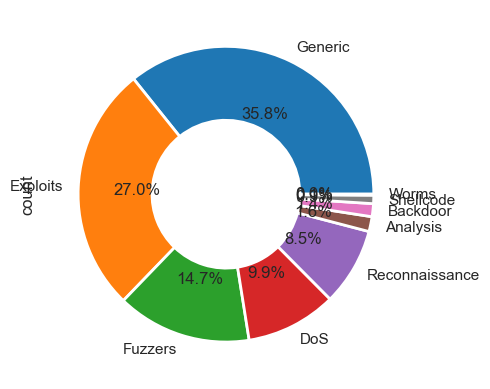

In [8]:
#explore different types of attacks
print(df[df['label']==1]['attack_cat'].value_counts())
#plot the pie plot of attacks
df[df['label']==1]['attack_cat'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops={'linewidth': 2, 'edgecolor': 'white', 'width': 0.50})

# Evaluation Metrics

Evaluating the performance of our cyber attack detection models is crucial to understanding their effectiveness and reliability. In this section, we outline the key evaluation metrics that will be used to assess the models' performance in distinguishing between benign and malicious network traffic.


In [9]:
#seperating the target columns in the training and testing data
from sklearn.model_selection import train_test_split
#split data into variables and target variables
X = df.loc[:,~df.columns.isin(['attack_cat','label'])]
Y = df['label'].values

#Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=11)

#Getting the list of variables
feature_names= list(X.columns)

#print shape of train and test data
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_test shape: ",Y_test.shape)


X_train shape:  (180371, 42)
Y_train shape:  (180371,)
X_test shape:  (77302, 42)
Y_test shape:  (77302,)


In [10]:
# Utilizing Decision Tree Model to Establish Criteria for Detecting Cyber Attacks in Our Rule-Based System
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#define parameter grid
param_grid ={
    'criterion': ['gini','entropy'],
    'max_depth': [2,4],
    'min_samples_leaf': [1,2]
}

#create a decision tree classifier
dt = DecisionTreeClassifier()

#use GridSearchCV to search the best parameters
grid_search = GridSearchCV(dt,param_grid, cv=5, scoring='recall')
grid_search.fit(X_train,Y_train)

#print best parameter and best score
print("Best parameter: ", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

Best parameter:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}
Best recall score: 1.0


In [11]:
#adjust the decision tree for high recall rate
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

clf = grid_search.best_estimator_


#make prediction on test data
Y_pred = clf.predict(X_test)

#calaculate mean absolute error of model
recall = recall_score(Y_test,Y_pred)
accuracy = accuracy_score(Y_test,Y_pred)
print("Recall: ", recall)
print("Accuracy: ",accuracy)

Recall:  1.0
Accuracy:  0.8728105353030969


In [12]:
# plot the tree 
from sklearn.tree import export_text
import dtreeviz

print(":::::::> The RULES FOR HIGH RECALL RATE <::::::: \n",export_text(clf,feature_names=feature_names))

# visualizing the tree
viz_model = dtreeviz.model(clf,X_train,Y_train,feature_names)

v = viz_model.view() 

:::::::> The RULES FOR HIGH RECALL RATE <::::::: 
 |--- sttl <= 61.00
|   |--- sinpkt <= 0.00
|   |   |--- class: 1
|   |--- sinpkt >  0.00
|   |   |--- class: 0
|--- sttl >  61.00
|   |--- synack <= 0.04
|   |   |--- class: 1
|   |--- synack >  0.04
|   |   |--- class: 1



We formulate rules for those identified as potential attacks in the decision tree and subsequently filter the testing set. 

The established rules are then applied to the testing data, referred to as `test_2`.

In [13]:
X_test = X_test.reset_index(drop=True)

#filter out testing part based on rules
rules="(sttl<=61.00 & sinpkt<=0.00) | (sttl > 61.00)"

#getting the index of records to keep
ind =X_test.query(rules).index

#filtering test set (both X_test and Y_test)
X_test_2 = X_test.loc[ind,:]
Y_test_2 = Y_test[ind]

print(X_test.shape)
print(X_test_2.shape)
print("filtered data", (1 - np.round(X_test_2.shape[0]/ X_test.shape[0],2))*100,"%")

(77302, 42)
(59265, 42)
filtered data 23.0 %


# Results of Rule-Based Filtering

The shape of the original testing dataset is `(77302, 42)`, while the filtered dataset, after applying the rules, is `(59265, 42)`. 

This results in a filtered data percentage of **23.0%**. 

These findings indicate that the rule-based approach is a highly effective method for detecting potential cyber attacks.


## Building the Random Forest Model

The Random Forest model demonstrates high accuracy in classifying complex data patterns. Its results are interpretable, facilitating the validation of its decisions. This interpretability leads to more effective and efficient cybersecurity measures.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create a Random Forest Model
rf = RandomForestClassifier(random_state=123)

# Train the model on Training Data
rf.fit(X_train, Y_train)

# Make prediction on test data
Y_pred = rf.predict(X_test_2)

# Calculate accuracy, recall, and precision of the model
acc = accuracy_score(Y_test_2, Y_pred)
rec = recall_score(Y_test_2, Y_pred)
per = precision_score(Y_test_2, Y_pred)

print("Recall: ", rec)
print("Precision: ", per)
print("Accuracy: ", acc)


Recall:  0.9596018853802116
Precision:  0.9647738366417182
Accuracy:  0.9370792204505188


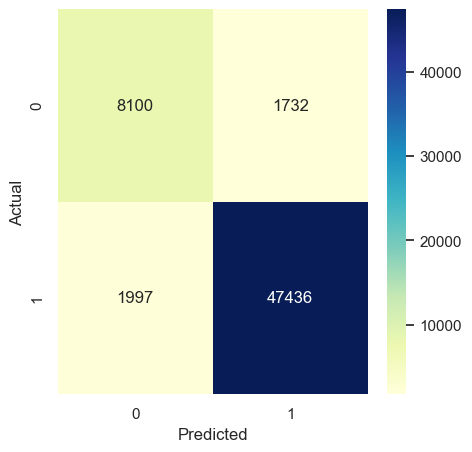

In [15]:
# Plot confusion matrix
cross = pd.crosstab(pd.Series(Y_test_2, name='Actual'), pd.Series(Y_pred, name='Predicted'))
plt.figure(figsize=(5, 5))
sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

## Justification of the Confusion Matrix

The confusion matrix presented above serves as a vital tool for assessing the performance of our Random Forest model in classifying cyber attack data. Each quadrant of the matrix provides insights into the model’s predictive capabilities:

- **True Positives (TP)**: 47,436 cases were correctly identified as actual cyber attacks. This high count of true positives underscores the model's strength in detecting malicious activities, which is crucial for timely intervention and response.

- **True Negatives (TN)**: 8,100 legitimate instances were accurately predicted as non-attacks. This not only highlights the model's reliability but also minimizes false alarms, allowing security teams to focus their resources effectively.

- **False Positives (FP)**: The model misclassified 1,732 legitimate activities as attacks. While this indicates some level of over-caution, it is important to consider that in cybersecurity, a higher number of false positives can lead to additional scrutiny, potentially uncovering previously unnoticed threats.

- **False Negatives (FN)**: The model missed 1,997 actual attacks. Although the goal is to reduce this number, it's essential to evaluate it in the context of overall performance and the potential impact of false negatives in a real-world setting. Continuous tuning and refinement of the model can help address these missed detections.


### Conclusion
The Random Forest model exhibits a strong performance, as evidenced by the significant numbers of true positives and true negatives in the confusion matrix. This indicates that our choice of model is well-suited for the complex patterns typically encountered in cyber attack data.

Moreover, the model's ability to effectively classify data translates into real-world benefits. It allows organizations to allocate resources more efficiently, respond promptly to genuine threats, and ultimately enhance their overall cybersecurity posture.

In summary, the confusion matrix not only demonstrates the efficacy of the Random Forest model but also underscores its role in developing a robust cybersecurity strategy that can adapt to the evolving threat landscape.


In [16]:
# save the 100th tree sample in random forest in the file
from sklearn.tree import export_text
feature_names = list(X.columns)

#Create a file and write to it
with open("Forest_Tree_output.txt","w") as file:
    print(export_text(rf.estimators_[99],spacing=3,decimals=2,feature_names=feature_names),file=file)
    


## Parameter Extraction for Firewall

The primary reason for saving the 100th tree sample from the Random Forest model is to extract parameters that can be applied in our firewall rules. By understanding the decision criteria established by this specific tree, we can formulate precise rules for the firewall to enhance its capability in detecting and mitigating cyber threats. This tailored approach allows for a more responsive and effective security posture.


## Gradient Boosting Machine (GBM) Classifier with Grid Search

In this section, we implement the Gradient Boosting Machine (GBM) classifier and utilize grid search for hyperparameter tuning. The GBM algorithm is renowned for its high predictive accuracy and adaptability to various types of data.

### Purpose of Comparison

The primary aim of implementing the GBM classifier is to compare its performance against our previously established Random Forest model. By conducting this comparison, we can assess which model delivers superior accuracy and robustness in detecting cyber attacks.


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

#hyperparameters for Grid Search
param_grid ={
    'learning_rate': [0.1],
    'n_estimators': [100],
    'max_depth': [1,3,5]
}
#perform Grid Search with GBC model with 5-fold cross-validation
grid_search = GridSearchCV(gbc, param_grid, cv=5)
grid_search.fit(X_train,Y_train)

#best parameter and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score:  0.939912739774801


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state=0).fit(X_train, Y_train)
print(clf.score(X_test_2, Y_test_2))

Y_pred = gbc.predict(X_test_2)

# Calculate the mean absolute error of the model
acc = accuracy_score(Y_test_2, Y_pred)
rec = recall_score(Y_test_2, Y_pred)
per = precision_score(Y_test_2, Y_pred)
print("Recall: ", rec)
print("Percision: ", per)
print("Accuracy: ", acc)

0.8341010714587025
Recall:  0.9497501668925616
Percision:  0.9471252773855154
Accuracy:  0.9138614696701257


## Conclusion: Choosing the Random Forest Classifier for Firewall Implementation

After conducting a thorough comparison between the Gradient Boosting Machine (GBM) classifier and the Random Forest classifier, it was determined that the Random Forest model provided superior results in terms of accuracy and effectiveness in detecting cyber attacks.

### Key Findings

- The Random Forest classifier demonstrated a higher accuracy rate, indicating its robustness in classifying complex data patterns.
- The model's interpretability and the ability to extract decision rules made it an ideal choice for implementing in our firewall system.

### Implementation for Firewall

Given these results, the Random Forest classifier will be utilized to establish rules and parameters for the firewall. This implementation will enhance our security measures, allowing for more efficient detection and mitigation of potential cyber threats. By leveraging the strengths of the Random Forest model, we aim to bolster our cybersecurity framework effectively.


## Saving the Random Forest Model for Future Use

To ensure that we can easily access and utilize the trained Random Forest classifier in the future, we will save the model to a file. This process allows us to avoid retraining the model every time we need to make predictions, thereby saving time and computational resources.


In [19]:
import joblib
#Save the trained model in file
joblib.dump(rf,'random_forest_model.pkl')

['random_forest_model.pkl']

## Correlations

Understanding the correlations between various features in our dataset and the label column, which indicates cyber attacks, is crucial for feature selection and model performance. Correlation analysis helps us identify which variables have the strongest relationships with the target label, allowing us to prioritize significant features in our model.

This analysis will be used to extract the top 10 features that are most correlated with cyber attacks. Since not all features can be integrated into the firewall, focusing on these top features ensures that we implement the most impactful parameters for effectively blocking unwanted packets and enhancing our cybersecurity measures.


Text(0.5, 1.0, 'Features Correlating with the Label')

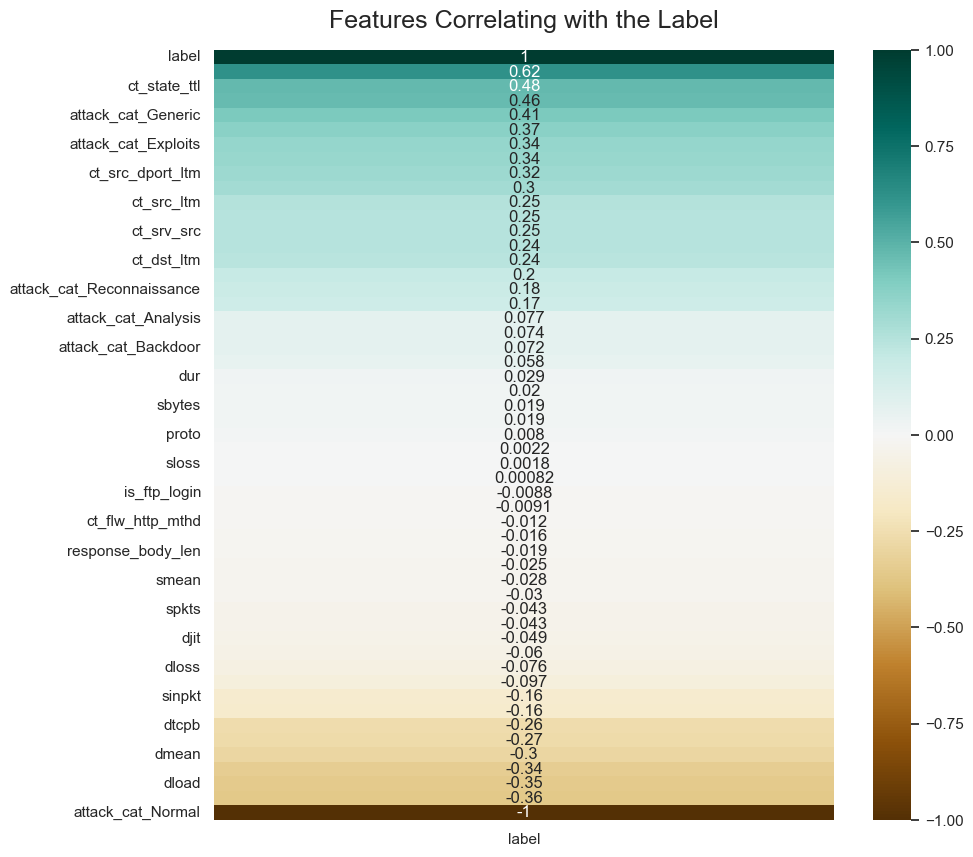

In [24]:
# Convert categorical data to dummy variables (one-hot encoding)
df_encoded = pd.get_dummies(df)

# Calculate correlation matrix
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df_encoded.corr()[['label']].sort_values(by='label', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the Label', fontdict={'fontsize':18}, pad=16)


### Feature Ranking From Random Forest

In [25]:
# creating of ranking data frame
feature_imp = pd.DataFrame({'Name':X.columns, 'Importance':rf.feature_importances_})

# sorting the features based on their importance value
feature_imp = feature_imp.sort_values('Importance',ascending=False).reset_index(drop=True)

# show only 10 most important feature in style of gradien of colores
feature_imp[:10].style.background_gradient()

,Name,Importance
0,sttl,0.145638
1,ct_state_ttl,0.106553
2,dload,0.050570
3,sload,0.049528
4,rate,0.048202
5,smean,0.040595
6,sbytes,0.040532
7,ct_dst_src_ltm,0.038633
8,dttl,0.038604
9,ct_srv_dst,0.035995


### Top 10 Features for Cyber Attack Detection

The following features have been identified as the top 10 variables correlated with cyber attack detection, based on the feature importance scores from our Random Forest model:

1. **sttl**: This feature represents the state TTL (Time to Live) values. A higher or unusual TTL value may indicate potential anomalies in network traffic, making it crucial for identifying potential cyber threats.

2. **ct_state_ttl**: This feature tracks the count of distinct flows that have the same state TTL. Monitoring this value helps in detecting unusual patterns that could signify an ongoing attack.

3. **dload**: This feature indicates the amount of data downloaded during a session. Large or unusual download sizes may be indicative of data exfiltration attempts, making it essential for threat detection.

4. **sload**: Similar to dload, the sload feature measures the amount of data sent during a session. High values could signal abnormal behaviors, such as a compromised system attempting to send sensitive data out.

5. **rate**: This feature measures the rate of packets or connections over a specific time interval. An increase in rate may suggest a flood attack or abnormal spikes in network activity that warrant further investigation.

6. **smean**: This feature represents the mean value of packets sent during a session. Monitoring this metric can help detect sessions that deviate from normal behavior, indicating potential threats.

7. **sbytes**: This feature counts the total bytes sent from the source to the destination. Anomalies in this metric can help identify unauthorized data transfers or suspicious activity.

8. **ct_dst_src_ltm**: This feature tracks the count of distinct source-destination pairs in the long-term memory. Unusual patterns in these counts may indicate malicious activities.

9. **dttl**: The destination TTL value helps to identify how long a packet has been allowed to traverse the network. Anomalies in this value could indicate possible interception or manipulation of packets.

10. **ct_srv_dst**: This feature counts the number of distinct services that communicate with a particular destination. An increase in this count could signify probing or scanning activities, commonly associated with cyber attacks.

### Integration into the Firewall

We will integrate these top 10 features into our firewall system. By focusing on these key parameters, we aim to enhance our ability to detect and block unwanted packets effectively, thereby strengthening our overall cybersecurity posture. This targeted approach ensures that we utilize the most impactful features for proactive threat detection and mitigation.
